In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import math
from common import NWSL, Fonts, Colors, Images, add_twitter_handle, add_source, Data

In [2]:
df = pd.read_csv("../playoff-constraints/data/2024.csv")
df["season"] = "2024"
# df.loc[df["date"] > "2024-09-12", ["home_score", "away_score"]] = None
df

,date,home,away,home_score,away_score,season
0,2024-03-16,KC,POR,5.0,4.0,2024
1,2024-03-16,LOU,ORL,2.0,2.0,2024
2,2024-03-16,UTA,CHI,0.0,2.0,2024
3,2024-03-16,NC,HOU,5.0,1.0,2024
4,2024-03-17,RGN,WAS,1.0,0.0,2024
...,...,...,...,...,...,...
177,2024-11-01,UTA,NJY,NaN,NaN,2024
178,2024-11-02,ORL,RGN,NaN,NaN,2024
179,2024-11-02,HOU,BFC,NaN,NaN,2024
180,2024-11-03,CHI,KC,NaN,NaN,2024


In [3]:
table = Data.get_nwsl_standings(df)
table

,team,wins,draws,losses,goals_for,goals_against,goals_diff,points
1,ORL,14,6,0,37.0,12.0,25.0,48
2,WAS,14,2,4,42.0,21.0,21.0,44
3,NJY,12,4,4,25.0,17.0,8.0,40
4,KC,11,6,3,43.0,28.0,15.0,39
5,NC,10,2,8,27.0,21.0,6.0,32
6,POR,8,3,9,29.0,28.0,1.0,27
7,CHI,8,2,10,26.0,28.0,-2.0,26
8,BFC,8,1,11,25.0,32.0,-7.0,25
9,LOU,5,7,8,28.0,28.0,0.0,22
10,LA,6,3,11,23.0,33.0,-10.0,21


In [4]:
remaining = df[df["home_score"].isna()]

In [5]:
xpts = pd.DataFrame(
    [
        ["KC", 42.5],
        ["ORL", 37.6],
        ["WAS", 34.9],
        ["NJY", 33.8],
        ["POR", 27.6],
        ["SD", 27.3],
        ["RGN", 26.7],
        ["BFC", 26.7],
        ["LOU", 26.3],
        ["NC", 26.0],
        ["LA", 24.3],
        ["CHI", 22.3],
        ["UTA", 17.4],
        ["HOU", 15.5],
    ],
    columns=["team", "xpts"],
)
xpts.index = xpts.index + 1
xpts

,team,xpts
1,KC,42.5
2,ORL,37.6
3,WAS,34.9
4,NJY,33.8
5,POR,27.6
6,SD,27.3
7,RGN,26.7
8,BFC,26.7
9,LOU,26.3
10,NC,26.0


In [6]:
def get_index(team):
    return table[table["team"] == team].index[0]

def get_xpts_rank_index(team):
    return xpts[xpts["team"] == team].index[0]

def get_xpts(team):
    return xpts[xpts["team"] == team].iloc[0]["xpts"]


for team in table["team"]:
    team_index = get_index(team)
    subset = remaining[(remaining["home"] == team) | (remaining["away"] == team)]
    subset.loc[:, "opp_rank"] = subset.apply(
        lambda row: get_index(row["away"])
        if team == row["home"]
        else get_index(row["home"]),
        axis=1,
    )
    subset.loc[:, "opp_xpts_rank"] = subset.apply(
        lambda row: get_xpts_rank_index(row["away"])
        if team == row["home"]
        else get_xpts_rank_index(row["home"]),
        axis=1,
    )
    subset.loc[:, "opp_xpts"] = subset.apply(
        lambda row: get_xpts(row["away"])
        if team == row["home"]
        else get_xpts(row["home"]),
        axis=1,
    )
    subset.loc[:, "below"] = subset["opp_rank"] > team_index
    subset.loc[:, "above"] = subset["opp_rank"] < team_index
    table.loc[team_index, ["above", "below"]] = [
        subset["above"].sum(),
        subset["below"].sum(),
    ]
    table.loc[team_index, ["opp_rank_" + str(x) for x in range(len(subset.index))]] = sorted(list(subset["opp_rank"]))
    table.loc[team_index, ["opp_xpts_rank_" + str(x) for x in range(len(subset.index))]] = sorted(list(subset["opp_xpts_rank"]))
    table.loc[team_index, ["opp_xpts_" + str(x) for x in range(len(subset.index))]] = sorted(list(subset["opp_xpts"]))

<ipython-input-6-d06c2a233a55>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, "opp_rank"] = subset.apply(
<ipython-input-6-d06c2a233a55>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, "opp_xpts_rank"] = subset.apply(
<ipython-input-6-d06c2a233a55>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

<ipython-input-6-d06c2a233a55>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, "above"] = subset["opp_rank"] < team_index
<ipython-input-6-d06c2a233a55>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, "opp_rank"] = subset.apply(
<ipython-input-6-d06c2a233a55>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [7]:
table

,team,wins,draws,losses,goals_for,goals_against,goals_diff,points,above,below,...,opp_xpts_rank_2,opp_xpts_rank_3,opp_xpts_rank_4,opp_xpts_rank_5,opp_xpts_0,opp_xpts_1,opp_xpts_2,opp_xpts_3,opp_xpts_4,opp_xpts_5
1,ORL,14,6,0,37.0,12.0,25.0,48,0.0,6.0,...,5.0,7.0,8.0,14.0,15.5,26.7,26.7,27.6,33.8,34.9
2,WAS,14,2,4,42.0,21.0,21.0,44,1.0,5.0,...,9.0,10.0,11.0,12.0,22.3,24.3,26.0,26.3,37.6,42.5
3,NJY,12,4,4,25.0,17.0,8.0,40,1.0,5.0,...,8.0,12.0,13.0,13.0,17.4,17.4,22.3,26.7,37.6,42.5
4,KC,11,6,3,43.0,28.0,15.0,39,2.0,4.0,...,6.0,8.0,9.0,12.0,22.3,26.3,26.7,27.3,33.8,34.9
5,NC,10,2,8,27.0,21.0,6.0,32,1.0,5.0,...,8.0,9.0,11.0,12.0,22.3,24.3,26.3,26.7,27.3,34.9
6,POR,8,3,9,29.0,28.0,1.0,27,1.0,5.0,...,9.0,11.0,11.0,13.0,17.4,24.3,24.3,26.3,27.3,37.6
7,CHI,8,2,10,26.0,28.0,-2.0,26,4.0,2.0,...,4.0,6.0,10.0,14.0,15.5,26.0,27.3,33.8,34.9,42.5
8,BFC,8,1,11,25.0,32.0,-7.0,25,4.0,2.0,...,4.0,7.0,10.0,14.0,15.5,26.0,26.7,33.8,37.6,42.5
9,LOU,5,7,8,28.0,28.0,0.0,22,4.0,2.0,...,5.0,6.0,10.0,13.0,17.4,26.0,27.3,27.6,34.9,42.5
10,LA,6,3,11,23.0,33.0,-10.0,21,4.0,2.0,...,5.0,7.0,10.0,13.0,17.4,26.0,26.7,27.6,27.6,34.9


<ipython-input-8-8a04b2487c4d>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(map(lambda x: NWSL.name("KCC" if x == "KC" else x), table["team"])))


<Figure size 2400x1600 with 0 Axes>

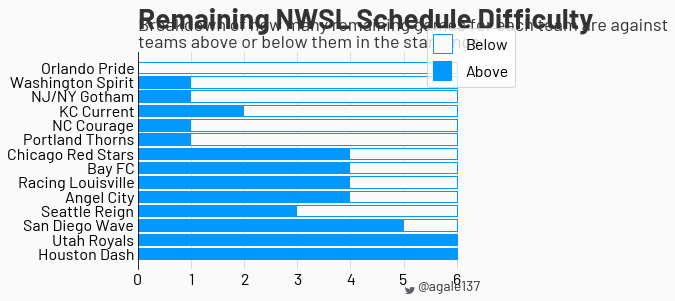

In [8]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.figure(dpi=400)
fig, ax = plt.subplots()
ax.set_facecolor(Colors.WHITE)
fig.patch.set_facecolor(Colors.WHITE)

BLUE = "#0198FF"

# Plot data
b1 = plt.barh(table["team"], table["above"] + table["below"], color=Colors.WHITE, edgecolor=BLUE)
b2 = plt.barh(table["team"], table["above"], color=BLUE)

# Legend
fp = Fonts.BARLOW
fp.set_size(16)
plt.rcParams['legend.handlelength'] = 1.2
plt.rcParams['legend.handleheight'] = 1.5
plt.legend([b1, b2], ["Below", "Above"], loc="lower right", prop=fp, bbox_to_anchor=(1.15, 0.8))

# Axes
ax.spines[["top", "bottom", "right"]].set_visible(False)
ax.set_axisbelow(True)
ax.xaxis.grid(True, color=Colors.LIGHT_GRAY)
ax.invert_yaxis()
ax.set_yticklabels(list(map(lambda x: NWSL.name("KCC" if x == "KC" else x), table["team"])))
ax.tick_params(axis="both", which="both", length=0)
for label in ax.get_yticklabels() + ax.get_xticklabels():
    fp = Fonts.BARLOW
    fp.set_size(16)
    label.set_fontproperties(fp)

# Title
ax.text(
    0,
    -2.8,
    "Remaining NWSL Schedule Difficulty",
    fontproperties=Fonts.BARLOW_BOLD,
    color=Colors.BLACK,
    size=28,
    ha="left",
)

# Subtitle
ax.text(
    0,
    -1.4,
    "Breakdown of how many remaining games for each team are against\nteams above or below them in the standings.",
    fontproperties=Fonts.BARLOW,
    color=Colors.BLACK,
    size=18,
    ha="left",
)

# Twitter logo and username
add_twitter_handle(fig, x=0.74, y=0.04, fs=14, w=0.025)

# Save image
plt.savefig(
    "images/schedule_difficulty.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)

<ipython-input-11-3299a520d03c>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(


<Figure size 4000x3200 with 0 Axes>

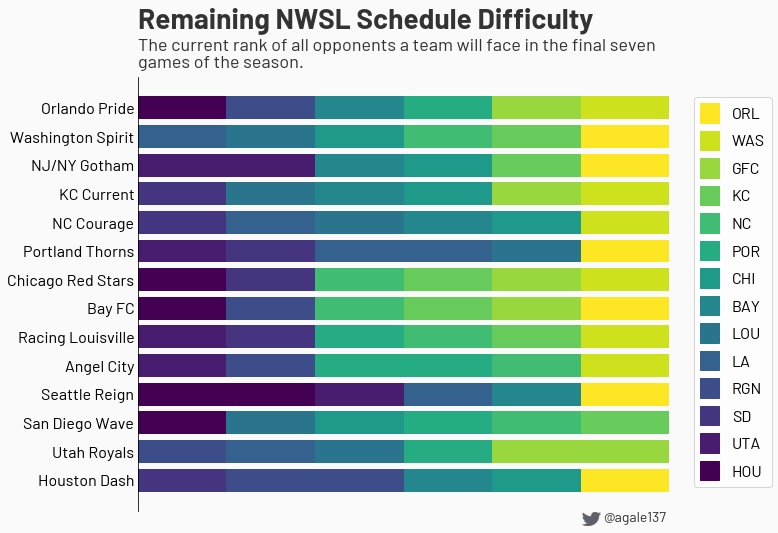

In [11]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.figure(dpi=400)
fig, ax = plt.subplots()
ax.set_facecolor(Colors.WHITE)
fig.patch.set_facecolor(Colors.WHITE)

BLUE = "#0198FF"


def rank_to_color(rank):
    return cm.viridis((14 - rank) / 13)


# Plot data
for i in range(6):
    plt.barh(table["team"], 6 - i, color=rank_to_color(table["opp_rank_" + str(i)]))

# Legend
p = Fonts.BARLOW
fp.set_size(16)
plt.rcParams["legend.handlelength"] = 1.2
plt.rcParams["legend.handleheight"] = 1.5

patches = []
for i, row in table.iterrows():
    team = row["team"]
    if team == "BFC":
        team = "BAY"
    elif team == "NJY":
        team = "GFC"
    patches.append(mpatches.Patch(color=rank_to_color(i), label=team))

plt.legend(handles=patches, loc="lower right", prop=fp, bbox_to_anchor=(1.15, 0.038))

# Axes
ax.spines[["top", "bottom", "right"]].set_visible(False)
ax.set_axisbelow(True)
ax.xaxis.grid(True, color=Colors.LIGHT_GRAY)
ax.invert_yaxis()
ax.set_yticklabels(
    list(map(lambda x: NWSL.name("KCC" if x == "KC" else x), table["team"]))
)
ax.set_xticks([])
ax.tick_params(axis="both", which="both", length=0)
for label in ax.get_yticklabels() + ax.get_xticklabels():
    fp = Fonts.BARLOW
    fp.set_size(16)
    label.set_fontproperties(fp)

# Title
ax.text(
    0,
    -2.8,
    "Remaining NWSL Schedule Difficulty",
    fontproperties=Fonts.BARLOW_BOLD,
    color=Colors.BLACK,
    size=28,
    ha="left",
)

# Subtitle
ax.text(
    0,
    -1.4,
    "The current rank of all opponents a team will face in the final seven\ngames of the season.",
    fontproperties=Fonts.BARLOW,
    color=Colors.BLACK,
    size=18,
    ha="left",
)

# Twitter logo and username
add_twitter_handle(fig, x=0.74, y=0.1, fs=14, w=0.025)

# Save image
plt.savefig(
    "images/schedule_difficulty_color.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)

<ipython-input-12-87eefbf7bb9e>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(


<Figure size 4000x3200 with 0 Axes>

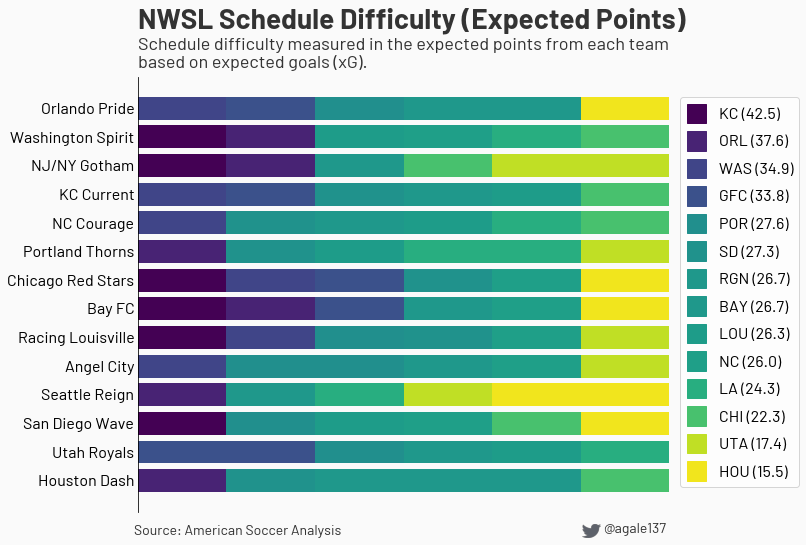

In [12]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.figure(dpi=400)
fig, ax = plt.subplots()
ax.set_facecolor(Colors.WHITE)
fig.patch.set_facecolor(Colors.WHITE)

BLUE = "#0198FF"


def rank_to_color(rank):
    return cm.viridis((40 - rank) / 25)


# Plot data
for i in range(6):
    plt.barh(table["team"], 6 - i, color=rank_to_color(table["opp_xpts_" + str(i)]))

# Legend
p = Fonts.BARLOW
fp.set_size(16)
plt.rcParams["legend.handlelength"] = 1.2
plt.rcParams["legend.handleheight"] = 1.5

patches = []
for i, row in xpts.iterrows():
    team = row["team"]
    if team == "BFC":
        team = "BAY"
    elif team == "NJY":
        team = "GFC"
    patches.append(
        mpatches.Patch(
            color=rank_to_color(row["xpts"]), label=team + " (" + str(row["xpts"]) + ")"
        )
    )

plt.legend(handles=patches, loc="lower right", prop=fp, bbox_to_anchor=(1.2, 0.038))

# Axes
ax.spines[["top", "bottom", "right"]].set_visible(False)
ax.set_axisbelow(True)
ax.xaxis.grid(True, color=Colors.LIGHT_GRAY)
ax.invert_yaxis()
ax.set_yticklabels(
    list(map(lambda x: NWSL.name("KCC" if x == "KC" else x), table["team"]))
)
ax.set_xticks([])
ax.tick_params(axis="both", which="both", length=0)
for label in ax.get_yticklabels() + ax.get_xticklabels():
    fp = Fonts.BARLOW
    fp.set_size(16)
    label.set_fontproperties(fp)

# Title
ax.text(
    0,
    -2.8,
    "NWSL Schedule Difficulty (Expected Points)",
    fontproperties=Fonts.BARLOW_BOLD,
    color=Colors.BLACK,
    size=28,
    ha="left",
)

# Subtitle
ax.text(
    0,
    -1.4,
    "Schedule difficulty measured in the expected points from each team\nbased on expected goals (xG).",
    fontproperties=Fonts.BARLOW,
    color=Colors.BLACK,
    size=18,
    ha="left",
)

# Twitter logo and username
add_twitter_handle(fig, x=0.74, y=0.08, fs=14, w=0.025)
add_source(fig, "American Soccer Analysis",  x=0.12, y=0.08, fs=14)

# Save image
plt.savefig(
    "images/schedule_difficulty_xpts.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)